In [20]:
import pandas as pd

df = pd.read_csv("../riskybet_2023-08-01T170427_097240.csv")

In [ ]:
df.head()

In [21]:
last_step_n = max(df.Step)
last_step_n

3000

In [22]:
last_step = df[df.Step == last_step_n]
last_step

,RunId,iteration,Step,grid_size,risk_adjustment,prob_risky_payoff,risky_bet,risk_min,risk_q1,risk_mean,risk_q3,risk_max,AgentID,risk_level,choice
2699101,0,0,3000,30,adopt,0.146268,False,0.921671,0.932366,0.959834,0.989232,0.997649,0.0,0.964861,Bet.SAFE
2699102,0,0,3000,30,adopt,0.146268,False,0.921671,0.932366,0.959834,0.989232,0.997649,1.0,0.962729,Bet.SAFE
2699103,0,0,3000,30,adopt,0.146268,False,0.921671,0.932366,0.959834,0.989232,0.997649,2.0,0.926470,Bet.SAFE
2699104,0,0,3000,30,adopt,0.146268,False,0.921671,0.932366,0.959834,0.989232,0.997649,3.0,0.989232,Bet.SAFE
2699105,0,0,3000,30,adopt,0.146268,False,0.921671,0.932366,0.959834,0.989232,0.997649,4.0,0.932366,Bet.SAFE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13500000,4,4,3000,30,adopt,0.263302,False,0.891088,0.906854,0.938672,0.985759,0.995927,895.0,0.912332,Bet.SAFE
13500001,4,4,3000,30,adopt,0.263302,False,0.891088,0.906854,0.938672,0.985759,0.995927,896.0,0.909342,Bet.SAFE
13500002,4,4,3000,30,adopt,0.263302,False,0.891088,0.906854,0.938672,0.985759,0.995927,897.0,0.986264,Bet.SAFE
13500003,4,4,3000,30,adopt,0.263302,False,0.891088,0.906854,0.938672,0.985759,0.995927,898.0,0.986130,Bet.SAFE


## overall risk distribution at end of simulations

<Axes: >

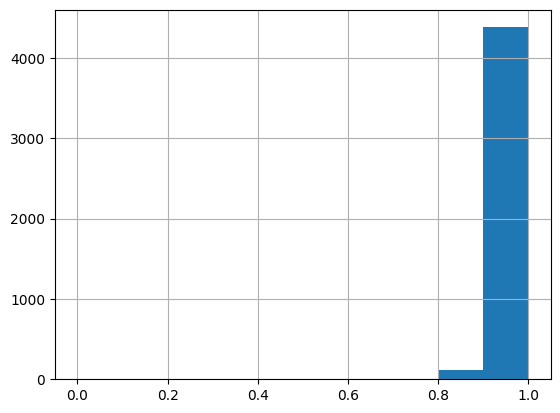

In [29]:
# overall ending risk distribution across all runs
last_step.risk_level.hist(range=[0,1])

<Axes: >

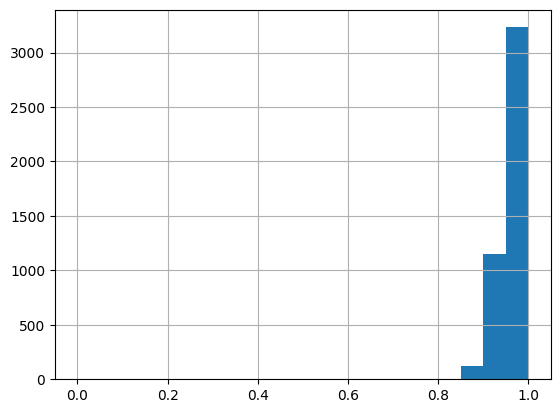

In [28]:
# does it look any different if we change the number of bins?
last_step.risk_level.hist(bins=20, range=[0, 1])

## histogram of ending risk levels for each simulation

In [25]:
last_step.RunId.unique()

array([0, 1, 2, 3, 4])

In [26]:
len(last_step.RunId.unique())

5

In [45]:
last_step.risk_level.describe()

count    4500.000000
mean        0.959786
std         0.030035
min         0.868069
25%         0.933203
50%         0.963950
75%         0.986489
max         0.998929
Name: risk_level, dtype: float64

count    900.000000
mean       0.959834
std        0.027286
min        0.921671
25%        0.933203
50%        0.961884
75%        0.989232
max        0.997649
Name: risk_level, dtype: float64
count    900.000000
mean       0.970092
std        0.021066
min        0.882463
25%        0.956693
50%        0.975349
75%        0.975349
max        0.997409
Name: risk_level, dtype: float64
count    900.000000
mean       0.965771
std        0.012998
min        0.896907
25%        0.962232
50%        0.963950
75%        0.963950
max        0.997160
Name: risk_level, dtype: float64
count    900.000000
mean       0.964561
std        0.032457
min        0.868069
25%        0.927329
50%        0.986650
75%        0.990270
max        0.998929
Name: risk_level, dtype: float64
count    900.000000
mean       0.938672
std        0.038634
min        0.891088
25%        0.906854
50%        0.912332
75%        0.985759
max        0.995927
Name: risk_level, dtype: float64


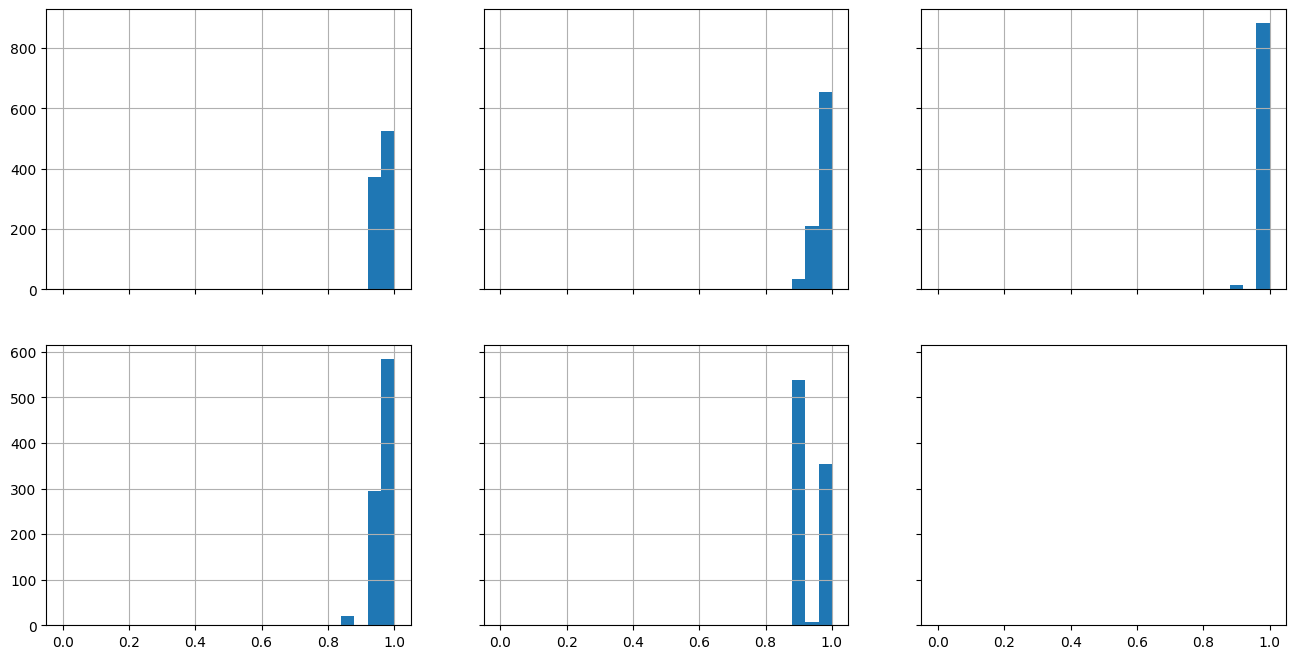

In [44]:
# plot a histogram of ending risk levels for each run
# combine into a grid of plots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(16,8))

for run in last_step.RunId.unique():
    run_last_step = last_step[last_step.RunId == run]
    print(run_last_step.risk_level.describe())
    plot_location = ax[int(run/3), int(run % 3)]
    run_last_step.risk_level.hist(ax=plot_location, bins=25, range=[0,1])
    # use grid size and risk adjustment strategy to title the plot
    grid_size = run_last_step.iloc[0].grid_size
    # plot_location.set_title("%dx%d grid, %s" % (grid_size, grid_size, run_last_step.iloc[0].risk_adjustment))

In [38]:
fig.savefig("riskybet_batch_300k.png")